## <center> Project Group - 06</center>

## Hyperparameter Optimization and Performance Assessment of Supervised Algorithms for Land Cover Classification

#### Suman Biswas, Md Mashiur Rahman, Sadia Sabrina Alam and Khandakar Faisal Ibn Murad
Scientific Officer, Bangladesh Agricultural Research Institute, Gazipur, 1701, Bangladesh.

## <font color=blue> Introduction </font>

<p style='text-align: justify;'> Land cover mapping (LCM) is one of the most commonly performed tasks in agro-environmental and geospatial research, whose domain ranges from physical geographic observations (e.g. information on the crop type, crop area, configuration of buildings, roads, identifying surface water bodies, etc.) to environmental planning [1–3] Classification and mapping land cover using geospatial datasets has become the foundation in illustrating the Earth's complex biophysical systems such as storm-water runoff and watershed hydrology [2]. On the other hand, land cover classification has become a powerful tool in explaining relationships between environmental changes to socio-economic activities [3]. The recent advances in high-end computer programming and the availability of free satellite imageries have brought the data science and remote sensing in the same platform [4]. It is now possible to quickly perform land cover and land use classifications over wider spatiotemporal spectrum using simplified machine learning or deep learning algorithms on powerful cloud computing platforms [2]. However, there are several practical challenges in supervised land cover classification in the field of ecological modeling such as hyperparameter optimization and performance evaluation [4].</p>

#### Objectives
Keeping that in mind, in this short project we would like to address the following objectives:

- determine the optimal (hyperparameter) settings for the supervised algorithms to achieve the best performances of the model
- compare the classification performances of different supervised machine learning algorithms

## <font color=blue> Methods </font>

### Dataset 

The publicly available [Sundarbans Satellite Imagery](https://github.com/syamkakarla98/Satellite_Imagery_Analysis/tree/main/Data/sundarbans_data) from Shyamnagar upazila of Satkhira district in Bangladesh with coordinates of (89.0799E, 22.1341N & 89.1335E, 22.2930N) which is a part of the Sundarbans satellite data was used in this study [5]. 

In [3]:
# %pip install ipyleaflet
print("Interactive Map for Study Location (the area with red rectange shape)")
from ipyleaflet import Map, Polygon
polygon = Polygon(
    locations=[(22.2929661069689722, 89.0798950195312642), (22.2929661069689722, 89.1334533691406250),
               (22.1341332998903049, 89.1334533691406250),(22.1341332998903049,89.0798950195312642)],
    color="red",
    fill_color="red",
    weight=1
)
myMap=Map(center=[22.2929661069689722, 89.0798950195312642], zoom=9)
myMap.add_layer(polygon)

myMap

Interactive Map for Study Location (the area with red rectange shape)


Map(center=[22.292966106968972, 89.07989501953126], controls=(ZoomControl(options=['position', 'zoom_in_text',…

<p style='text-align: justify;'> The dataset was acquired using the Sentinel-2 Satellite on 27 January 2020 which consists a total of 12 bands with the spectral resolution varying from 10-60 meters. After stacking these imageries into an n-dimensional array the resultant data has the shape of (12, 954, 298). The dataset also contains a ‘ground truth’ data with the shape of (954, 298) which has 6 classes namely water, plants, trees, bare land and geological contents.</p>

### Supervised Algorithm for Classification of Study Location

<p style='text-align: justify;'>The different supervised machine learning (SML) algorithms over Sundarbans imagery landcover were employed through hyperparameter tuning and their performances were assessed by following the SML algorithms: k-Nearest Neighbor (KNN), Random Forest (RF), Artificial Neural Networks (ANN), Support Vector Machine (SVM) and Extreme Gradient Boosting (Xgboost). In SML algorithms, the training data are crucial components, and most ML algorithms require a large number of training data samples. However, land cover classification maps with reasonably high overall accuracy can be produced using a large number of training samples with increased efficiency allowing for a wide range of feature representation [4]. This project design (<font color='red'>Figure 1</font>) involves initial with the large sample size of high-quality land cover classes map of the study area. In order to get higher accuracy, hyperparameter optimization (HPO) was applied, which was a model training process whereby optimal hyperparameters were selected for the algorithms. Moreover, model will be trained by optimizing K fold cross validation. In the case of SML, optimization was performed using grid search with the hyperparameter combinations up to a specified number of iterations. Furthermore, the performance of the model were performed through different metrices e.g. accuracy score and classification report</p>

Figure 1: Methodology Flowchart


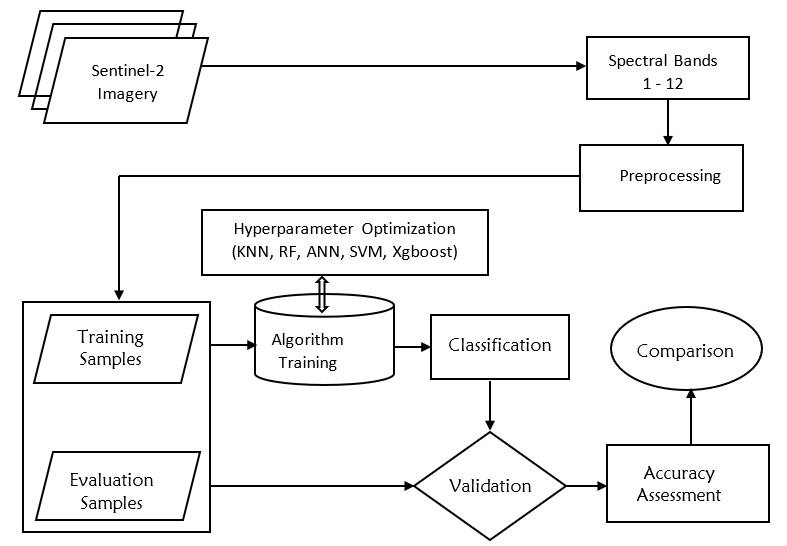

In [2]:
from IPython.display import Image
print('Figure 1: Methodology Flowchart')
Image(filename = "/data/private/Project/Data/Methodology Flowchart.JPG", height=600, width=600)

#### Hyperparameters Optimization
<p style='text-align:justify'> Hyperparameters are points of choice or configuration that allow a machine learning model to be customized for a specific task or dataset. Hyperparameter optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a parameter whose value is used to control the learning process. By contrast, the values of other parameters (typically node weights) are learned. Typically, a hyperparameter has a known effect on a model in the general sense, but it is not clear how to best set a hyperparameter for a given dataset. As such, it is often required to search for a set of hyperparameters that result in the best performance of a model on a dataset. This is called hyperparameter optimization, hyperparameter tuning, or hyperparameter search.

As such, it is often required to search for a set of hyperparameters that result in the best performance of a model on a dataset. This is called hyperparameter optimization, hyperparameter tuning, or hyperparameter search.
- Hyperparameter optimization finds a tuple of hyperparameters that yields an optimal model which minimizes a predefined loss function on given independent data. The objective function takes a tuple of hyperparameters and returns the associated loss. Cross-validation is often used to estimate this generalization performance.
- A range of different optimization algorithms may be used, although two of the simplest and most common methods are random search and grid search. Besides this, more advanced methods are sometimes used, such as Bayesian Optimization and Evolutionary Optimization. 
- In our model, grid search with scikit learn Python library are used and provides techniques to tune model hyperparameters.</p>

## <font color=blue>Results</font>

#### Setting the Environment

In [60]:
from glob import glob
import numpy as np
from scipy.io import loadmat
import rasterio as rio
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from pprint import pprint
from time import time
import os
import warnings
warnings.filterwarnings("ignore")

#### Read Data
<p style='text-align: justify;'> At first, the Sentinel-2 satellite imagery including the ‘ground truth’ data of the project location was downloaded from the online source (Kakarla 2021), and then uploaded to the Jupyter Notebook. (using the ) to perform the projected tasks. Then, with the help of <b>‘Glob’</b> module and GDAL and Numpy-based Python library called <b>‘Rasterio’</b>, all 12 different spectral bands were composited or stacked to form a n-dimensional numpy array. The resultant data, which would later feed as the input data had the shape of 12 × 954 × 298</p>

##### Input Data

In [4]:
# Data Directory
os.chdir('/data/private/Project/Data')

# Read bands
sentinel_bands = glob("*B?*.tiff")
sentinel_bands.sort()

# Composite the bands
l = []
for i in sentinel_bands:
  with rio.open(i, 'r') as f:
    l.append(f.read(1))

# Data as array
arr_st = np.stack(l)
arr_st.shape

(12, 954, 298)

##### Ground Truth
<p style='text-align: justify;'> The ground truth of the satellite image is read using the loadmat method from the scipy.io package. The ground truth has 6 classes which include water, plants, trees, bare land, e.t.c which was two-dimensional (954 × 298).</p>

In [5]:
# Ground Truth
y_data = loadmat('Sundarbands_gt.mat')['gt']
display(y_data)

array([[0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]], dtype=int32)

#### Data Visualization
<p style='text-align: justify;'>These Sundarbans data have multiple numbers of bands that contain the data ranging from visible to infrared. So it is hard to visualize the data for humans. By creating an RGB Composite Image makes it easier to understand the data effectively. To plot RGB composite images, we have plot the red, green, and blue bands, which are bands 4, 3, and 2, respectively. Since Python uses a zero-based index system, so we need to subtract a value of 1 from each index. Therefore, the index for the red band is 3, green is 2, and blue is 1.
Let’s see the code to plot the RGB composite image along with the stretch applied.</p>

In [9]:
# %pip install earthpy
import earthpy.plot as ep
import matplotlib.pyplot as plt

##### 12 bands visualization

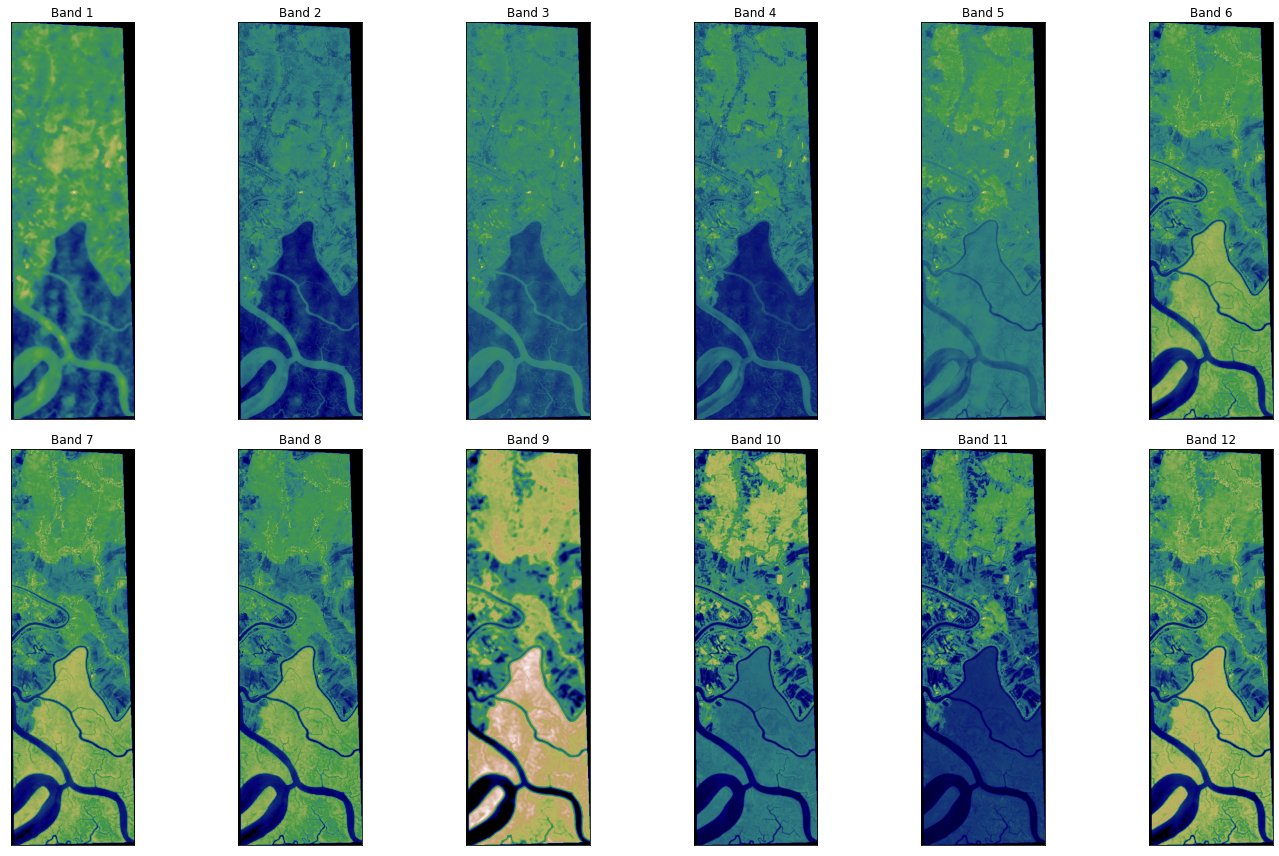

In [13]:
ep.plot_bands(arr_st, 
              cmap = 'gist_earth', 
              figsize = (20, 12), 
              cols = 6, 
              cbar = False)
plt.show()

##### Data Distribution of all bands

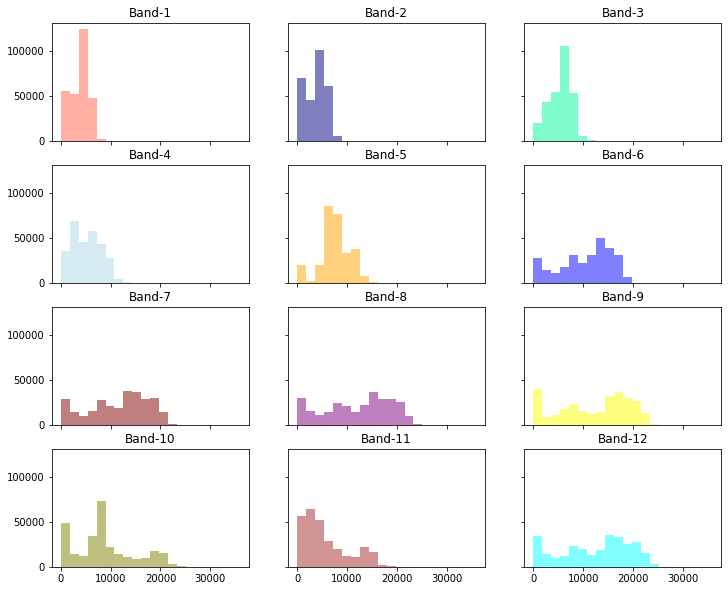

In [14]:
colors = ['tomato', 'navy', 'MediumSpringGreen', 'lightblue', 'orange', 'blue',
          'maroon', 'purple', 'yellow', 'olive', 'brown', 'cyan']

ep.hist(arr_st, 
         colors = colors,
        title=[f'Band-{i}' for i in range(1, 13)], 
        cols=3, 
        alpha=0.5, 
        figsize = (12, 10)
        )

plt.show()

##### RGB Composite Image of all bands

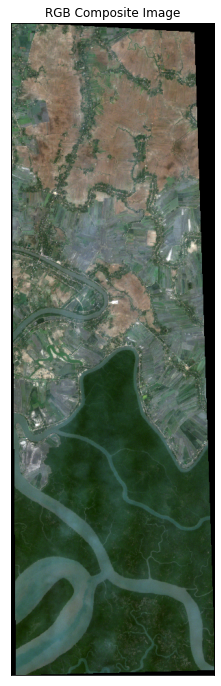

In [15]:
ep.plot_rgb(
    arr_st,
    rgb=(3, 2, 1),
    stretch=True,
    str_clip=0.02,
    figsize=(12, 12),
    title="RGB Composite Image",
)

plt.show()

##### Visualization of the ground truth

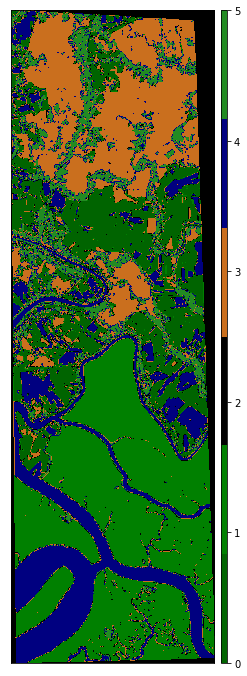

In [16]:
from matplotlib.colors import ListedColormap
# Visualize Groundtruth

ep.plot_bands(y_data, cmap=ListedColormap(['darkgreen', 'green', 'black', '#CA6F1E', 'navy', 'forestgreen']))
plt.show()

### Preprocessing
<p style='text-align: justify'>Standardization is one of the scaling techniques where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation. The scaled data is divided into train and test data in the ratio of 80:20. The below code is used to scale and split the data.</p>

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x = np.moveaxis(arr_st, 0, -1)

X_data = x.reshape(-1, 12)
scaler = StandardScaler().fit(X_data)
X_scaled = scaler.transform(X_data)

# Split data 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_data.ravel(), 
                                                    test_size=0.20, stratify = y_data.ravel())
print(f"X_train Shape: {X_train.shape}\nX_test Shape: {X_test.shape}\ny_train Shape: {y_train.shape}\ny_test Shape:{y_test.shape}")

X_train Shape: (227433, 12)
X_test Shape: (56859, 12)
y_train Shape: (227433,)
y_test Shape:(56859,)


### 01. k-Nearest Neighbors (KNN) Classifier
<p style='text-align: justify'>k-Nearest neighbor classifier is one of the widely used classifiers in supervised machine learning. The main objective of this method is that the data instances of the same class should be closer in the feature space.</p>

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# K-NNC
knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train, y_train)

# Predict the labels of test data

knn_pred = knn.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, knn_pred)*100}")

print(classification_report(y_test, knn_pred))

Accuracy: 98.95355176840958
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     10814
           1       1.00      1.00      1.00     15714
           2       1.00      1.00      1.00      4064
           3       0.99      0.99      0.99     11193
           4       0.99      0.99      0.99      9030
           5       0.98      0.96      0.97      6044

    accuracy                           0.99     56859
   macro avg       0.99      0.99      0.99     56859
weighted avg       0.99      0.99      0.99     56859



The (default) k-Nearest Neighbors (KNN) model has shown 98.95 % accuracy on the test data

In [18]:
# Look at parameters used by our current knn
print('Parameters currently in use:\n')
pprint(knn.get_params())

Parameters currently in use:

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 6,
 'p': 2,
 'weights': 'uniform'}


##### Fit the best knn model through hyperparameter optimization

In [29]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,10))
weights = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
p=[1,2]

#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, weights=weights, algorithm=algorithm, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier(n_neighbors=6)
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=5, n_jobs=-1)

#Fit the model
best_model = clf.fit(X_train, y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best weights:', best_model.best_estimator_.get_params()['weights'])
print('Best algorithm:', best_model.best_estimator_.get_params()['algorithm'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 2
Best n_neighbors: 6


##### Prediction and Performance accuracy of the best model

In [30]:
# Predict the labels of test data
model = best_model.best_estimator_
model.fit(X_train, y_train)
model_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, model_pred)*100}")

print(classification_report(y_test, model_pred))

Accuracy: 99.05262170528093
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     16222
           1       1.00      1.00      1.00     23570
           2       1.00      1.00      1.00      6095
           3       0.99      0.99      0.99     16790
           4       0.99      0.99      0.99     13545
           5       0.97      0.97      0.97      9066

    accuracy                           0.99     85288
   macro avg       0.99      0.99      0.99     85288
weighted avg       0.99      0.99      0.99     85288



After Hyperparameter optimization the (best) knn model has shown 99.05% accuracy which is 0.11 higher than that of default model.

##### Visualize Classification Map of K-NNC after hyperparameter tuning

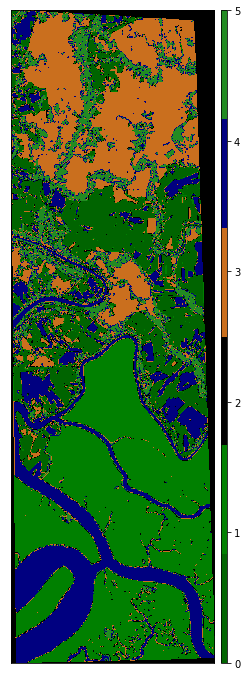

In [33]:
ep.plot_bands(model.predict(X_scaled).reshape((954, 298)), 
              cmap=ListedColormap(['darkgreen', 'green', 'black', '#CA6F1E', 'navy', 'forestgreen']))
plt.show()

### 02. Support Vector Machine (SVM) Classifier
<p style='text-align: justify'> The support vector machine (SVM) is a supervised learning method that generates input-output mapping functions from a set of labeled training data. The mapping function can be either a classification function, i.e., the category of the input data, or a regression function.
For classification, nonlinear kernel functions such as Radial Basis Function(RBF), Polynomial, Sigmoid, e.t.c are often used to transform input data to a high-dimensional feature space in which the input data become more separable compared to the original input space. Maximum-margin hyperplanes are then created. The model thus produced depends on only a subset of the training data near the class boundaries.
The below code is used to create an instance of SVM with the regularization parameter C as 3 and RBF kernel. Fits the data, predict the labels for test data, and prints the accuracy and classification report.</p>

In [65]:
from sklearn.svm import SVC

svm = SVC(degree=6, random_state=42)

# Fit Data
svm.fit(X_train, y_train)

# Predict labels for test data
svm_pred = svm.predict(X_test)

# Accuracy and Classification Reeport
print(f"Accuracy: {accuracy_score(y_test, svm_pred)*100}")
print(classification_report(y_test, svm_pred))

Accuracy: 99.84171371286867
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10814
           1       1.00      1.00      1.00     15714
           2       1.00      1.00      1.00      4064
           3       1.00      1.00      1.00     11193
           4       1.00      1.00      1.00      9030
           5       1.00      1.00      1.00      6044

    accuracy                           1.00     56859
   macro avg       1.00      1.00      1.00     56859
weighted avg       1.00      1.00      1.00     56859



The Support Vector Machine (SVM) algorithm has shown 99.84% accuracy on the test data.

In [28]:
# Look at parameters used by our current svm
print('Parameters currently in use:\n')
pprint(svm.get_params())

Parameters currently in use:

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 6,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


##### Fit the best SVM through hyperparameter optimization

In [67]:
# Create a dictionary of param_grid
param_grid = {'C': [1, 10, 100], 'gamma': ['scale', 'auto'],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(random_state=42),param_grid,cv=5, n_jobs=-1,verbose=False)
grid.fit(X_train,y_train)
print(grid.best_estimator_)

SVC(C=100, random_state=42)


##### Prediction and Performance Assessment of the best model

In [68]:
svm_model = grid.best_estimator_
svm_model.fit(X_train, y_train)
svm_model_pred = svm_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, svm_model_pred)*100}")

print(classification_report(y_test, svm_model_pred))

Accuracy: 99.88216465291335
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10814
           1       1.00      1.00      1.00     15714
           2       1.00      1.00      1.00      4064
           3       1.00      1.00      1.00     11193
           4       1.00      1.00      1.00      9030
           5       1.00      1.00      1.00      6044

    accuracy                           1.00     56859
   macro avg       1.00      1.00      1.00     56859
weighted avg       1.00      1.00      1.00     56859



After Hyperparameter optimization the (best) SVM has shown 99.88% accuracy which is 0.04 higher than that of default model.

#### Visualize Classification Map of SVM after hypertuning

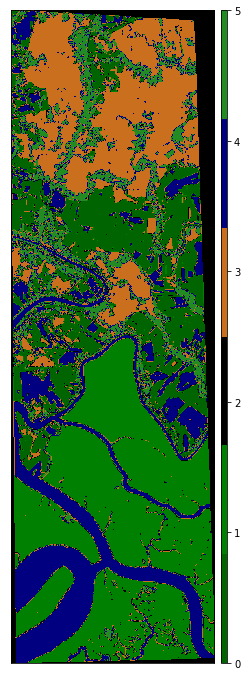

In [29]:
ep.plot_bands(svm_model.predict(X_scaled).reshape((954, 298)), 
              cmap=ListedColormap(['darkgreen', 'green', 'black', 
                                   '#CA6F1E', 'navy', 'forestgreen']))
plt.show()

### 03. Random Forest Classifier
<p style='text-align: justify'>A random forest is a machine learning technique that's used to solve regression and classification problems. It utilizes ensemble learning, which is a technique that combines many classifiers to provide solutions to complex problems. A random forest algorithm consists of many decision trees.</p>
- A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [69]:
from sklearn.ensemble import RandomForestClassifier
# Evaluate the Default Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)


print(f"Accuracy: {accuracy_score(y_test, rf_y_pred)*100}")

print(classification_report(y_test, rf_y_pred))

Accuracy: 98.97817407974111
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     10814
           1       1.00      1.00      1.00     15714
           2       1.00      1.00      1.00      4064
           3       0.99      0.99      0.99     11193
           4       0.99      0.99      0.99      9030
           5       0.97      0.97      0.97      6044

    accuracy                           0.99     56859
   macro avg       0.99      0.99      0.99     56859
weighted avg       0.99      0.99      0.99     56859



The (default) Random Forest Classifier algorithm has shown 98.98% accuracy on the test data.

In [41]:
# Look at parameters used by our current random forest
print('Parameters currently in use:\n')
pprint(rf_model.get_params())
print(rf_model.n_classes_)

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}
6


##### Fit the best Random Forest Classifier through hyperparameter optimization

In [70]:
# use a full grid over all parameters
rf_grid = {"max_depth": [6, None],
              "max_features": ['auto', 'sqrt', 'log2'],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
rf_grid_search = GridSearchCV(rf_model, param_grid=rf_grid, cv=5, n_jobs=-1)
start = time()
rf_grid_search.fit(X_train, y_train)

rf_grid_search.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto'}

##### Prediction and Performance Assessment of the best RF model

In [71]:
# Predict the labels of test data
rf_best_model = rf_grid_search.best_estimator_
rf_best_model.fit(X_train, y_train)
rf_best_model_pred = rf_best_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, rf_best_model_pred)*100}")

print(classification_report(y_test, rf_best_model_pred))

Accuracy: 99.07138711549622
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     10814
           1       1.00      1.00      1.00     15714
           2       1.00      1.00      1.00      4064
           3       0.99      0.99      0.99     11193
           4       0.99      0.99      0.99      9030
           5       0.97      0.97      0.97      6044

    accuracy                           0.99     56859
   macro avg       0.99      0.99      0.99     56859
weighted avg       0.99      0.99      0.99     56859



After Hyperparameter optimization the (best) RF model has shown 99.07% accuracy which is 0.09 higher than that of default model.

##### Visualize Classification Map of Random Forest after hyperparameter tuning

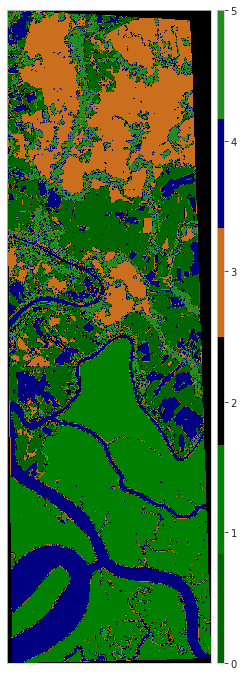

In [74]:
ep.plot_bands(rf_best_model.predict(X_scaled).reshape((954, 298)), 
              cmap=ListedColormap(['darkgreen', 'green', 'black', 
                                   '#CA6F1E', 'navy', 'forestgreen']))
plt.show()

### 04. Artificial Neural Network
<p style='text-align: justify'> A Artificial Neural Betwork (ANN) is a type of machine learning model that is usually used in supervised learning that accepts an training input and performs a computation on that input.
Artificial neural networks (ANN) are used for modelling non-linear problems and to predict the output values for given input parameters from their training values.</p>

In [75]:
from sklearn.neural_network import MLPClassifier
# Evaluate the default model
ann_model = MLPClassifier(random_state=42)

ann_model.fit(X_train, y_train)

ann_model_pred = ann_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, ann_model_pred)*100}")

print(classification_report(y_test, ann_model_pred))

Accuracy: 99.85930107810549
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10814
           1       1.00      1.00      1.00     15714
           2       1.00      1.00      1.00      4064
           3       1.00      1.00      1.00     11193
           4       1.00      1.00      1.00      9030
           5       1.00      1.00      1.00      6044

    accuracy                           1.00     56859
   macro avg       1.00      1.00      1.00     56859
weighted avg       1.00      1.00      1.00     56859



The (default) ANN Classifier algorithm has shown 99.86% accuracy on the test data.

In [19]:
# Look at parameters used by our current ann
print('Parameters currently in use:\n')
pprint(ann_model.get_params())
print(ann_model.classes_)

Parameters currently in use:

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 42,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}
[0 1 2 3 4 5]


##### Fit the best MLP Classifier trough hyperparameter optimization

In [78]:
# use a full grid over all parameters
ann_grid ={'activation':['identity', 'logistic', 'tanh', 'relu'],
           'solver':['lbfgs', 'sgd', 'adam'],
           'learning_rate':['constant', 'invscaling', 'adaptive']}

# run grid search
ann_grid_search = GridSearchCV(ann_model, param_grid=ann_grid, cv=5, n_jobs=-1)

ann_grid_search.fit(X_train, y_train)

ann_grid_search.best_params_

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/

{'activation': 'identity', 'learning_rate': 'constant', 'solver': 'lbfgs'}

##### Prediction and Performance Assessment of the best ANN model

In [79]:
# Predict the labels of test data
ann_best_model = ann_grid_search.best_estimator_
ann_best_model.fit(X_train, y_train)
ann_best_model_pred = ann_best_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, ann_best_model_pred)*100}")

print(classification_report(y_test, ann_best_model_pred))

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/

Accuracy: 99.97361895214479
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10814
           1       1.00      1.00      1.00     15714
           2       1.00      1.00      1.00      4064
           3       1.00      1.00      1.00     11193
           4       1.00      1.00      1.00      9030
           5       1.00      1.00      1.00      6044

    accuracy                           1.00     56859
   macro avg       1.00      1.00      1.00     56859
weighted avg       1.00      1.00      1.00     56859



/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

After Hyperparameter optimization the (best) ANN model has shown 99.97% accuracy which is 0.07 higher than that of default model.

##### Visualize Classification Map of ANN after hyperparameter tuning

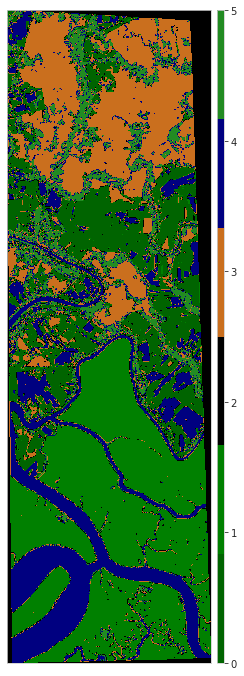

In [80]:
ep.plot_bands(ann_best_model.predict(X_scaled).reshape((954, 298)), 
              cmap=ListedColormap(['darkgreen', 'green', 'black', 
                                   '#CA6F1E', 'navy', 'forestgreen']))
plt.show()

## 05. Gradient Boosting Classifier
<p style='text-align:justify'> Gradient boosting is a technique attracting attention for its prediction speed and accuracy, especially with large and complex data. Gradient boosting is a type of supervised machine learning boosting. It relies on the intuition that the best possible next model, when combined with previous models, minimizes the overall prediction error. The key idea is to set the target outcomes for this next model to minimize the error.</p>

In [14]:
from xgboost import XGBClassifier
import xgboost as xgb
xgb_model  = XGBClassifier()
xgb_model.fit(X_train, y_train)

xgb_model_pred = xgb_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, xgb_model_pred)*100}")

print(classification_report(y_test, xgb_model_pred))

[14:43:53] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 99.38268348018782
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     10814
           1       1.00      1.00      1.00     15714
           2       1.00      1.00      1.00      4064
           3       1.00      1.00      1.00     11193
           4       0.99      1.00      1.00      9030
           5       0.98      0.98      0.98      6044

    accuracy                           0.99     56859
   macro avg       0.99      0.99      0.99     56859
weighted avg       0.99      0.99      0.99     56859



The (default) Extreme Gradient Boosting Classifier algorithm has shown 99.38% accuracy on the test data.

In [15]:
# Look at parameters used by our current xgb
print('Parameters currently in use:\n')
pprint(xgb_model.get_params())
print(xgb_model.classes_)

Parameters currently in use:

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 72,
 'num_parallel_tree': 1,
 'objective': 'multi:softprob',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': None,
 'subsample': 1,
 'tree_method': 'exact',
 'use_label_encoder': True,
 'validate_parameters': 1,
 'verbosity': None}
[0 1 2 3 4 5]


In [18]:
from xgboost import cv
# use a full grid over all parameters
xgb_train=xgb.DMatrix(X_train, label=y_train)
DM_test =  xgb.DMatrix(data = X_test, label = y_test)

xgb_grid = {'n_estimators':[100, 200],'max_depth': [10, 15, 20, 25]}
xgb_model  = XGBClassifier()
xgb_grid_search = GridSearchCV(estimator = xgb_model, param_grid = xgb_grid, cv = 5, verbose = 1)

xgb_grid_search.fit(X_train, y_train)

xgb_grid_search.best_params_

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[15:46:31] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:01:47] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:13:44] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:30:17] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'

{'max_depth': 10, 'n_estimators': 200}

In [19]:
# Predict the labels of test data
xgb_best_model = xgb_grid_search.best_estimator_
xgb_best_model.fit(X_train, y_train)
xgb_best_model_pred = xgb_best_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, xgb_best_model_pred)*100}")

print(classification_report(y_test, xgb_best_model_pred))

[19:33:12] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 99.39147716280624
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     10814
           1       1.00      1.00      1.00     15714
           2       1.00      1.00      1.00      4064
           3       1.00      1.00      1.00     11193
           4       1.00      1.00      1.00      9030
           5       0.98      0.98      0.98      6044

    accuracy                           0.99     56859
   macro avg       0.99      0.99      0.99     56859
weighted avg       0.99      0.99      0.99     56859



After Hyperparameter optimization the (best) Extreme Gradient Boosting algorithm has shown 99.39% accuracy which is only 0.01 higher than that of default model.

##### Visualize Classification Map of Extreme Gradient Boosting after hyperparameter tuning

In [ ]:
ep.plot_bands(xgb_best_model.predict(X_scaled).reshape((954, 298)), 
              cmap=ListedColormap(['darkgreen', 'green', 'black', 
                                   '#CA6F1E', 'navy', 'forestgreen']))
plt.show()

## <font color=blue>Summary and Conclusion</font>

We presented the Overall Accuracy of each machine learning algorithm before (default) and after hyperparameter optimization as pandas dataframe using the code below-

In [3]:
import pandas as pd
data = {'Method': ['KNN','SVM','RF','ANN','GB'],
        'Accuracy_Default': [98.948, 99.841, 98.978, 99.859, 99.383],
        'Accuracy_Optimized': [99.053, 99.882, 99.071, 99.973, 99.391]
        }
df = pd.DataFrame(data)
display(df)# Display accuracy score

,Method,Accuracy_Default,Accuracy_Optimized
0,KNN,98.948,99.053
1,SVM,99.841,99.882
2,RF,98.978,99.071
3,ANN,99.859,99.973
4,GB,99.383,99.391


Now we ranked the models besed on the derived accuracy scores (descending order)

In [4]:
# Rank the scores
df.sort_values(by= ['Accuracy_Default', 'Accuracy_Optimized'], ascending=False)

,Method,Accuracy_Default,Accuracy_Optimized
3,ANN,99.859,99.973
1,SVM,99.841,99.882
4,GB,99.383,99.391
2,RF,98.978,99.071
0,KNN,98.948,99.053


Based on the ranking, it was found that Artificial Neural Network provided best Overall Accuracy in both default hyperparameter setting and after optimization. 
Where as in both cases, k-Nearest Neighbors (KNN) had the lowest Overall Accuracy.

Text(0, 0.5, 'Model accuracy(%)')

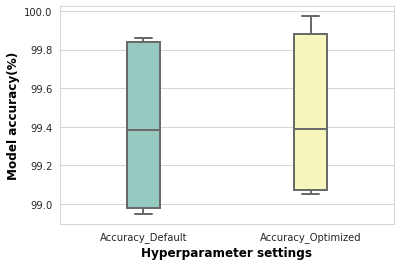

In [5]:
# Boxplot of the scores
import seaborn as sns
sns.set_style("whitegrid")
ax = sns.boxplot(data=df.loc[:, ['Accuracy_Default', 'Accuracy_Optimized']], palette="Set3", width=0.2, linewidth=2)
ax.set_xlabel('Hyperparameter settings', fontsize=12, color='k', fontweight='bold')
ax.set_ylabel('Model accuracy(%)', fontsize=12, color='k', fontweight='bold')

From the boxplot, it was clear that model prediction accuracies were improved through the hyperparameter optimizations.

In [84]:
# Changing scores (%) after hypertuning
df['Accuracy_improvement(%)'] = round((df['Accuracy_Optimized']-df['Accuracy_Default'])/(df['Accuracy_Default'])*100,2)
df.sort_values(by= ['Accuracy_improvement(%)'], ascending=False)

,Method,Accuracy_Default,Accuracy_Optimized,Accuracy_improvement(%)
0,KNN,98.948,99.053,0.11
3,ANN,99.859,99.973,0.11
2,RF,98.978,99.071,0.09
1,SVM,99.841,99.882,0.04
4,GB,99.383,99.391,0.01


<p style='text-align: justify'>Although the overall accuracy of k-Nearest Neighbors (KNN) algorithm was found least compared to the others, it's accuracy was improved most by applying hyperparameter optimization. On the other hand, in case of Gradient Boosting (GB) there was practically no accuracy gain after tuning of hyperparameters. </p>

### Conclusion

<p style='text-align:justify'> This was a short learning project where our goal was to execute the basic concepts (that we learned through this training course) of supervised land cover classification using five different machine learning algorithms and compare the performances. Due to the very limited timeframe, we selected a very small geographic area, whose geographic features were already identified by others so that it can be used as the ground truth. In the process of classification, we directly used the 12 spectral bands for identified features, where using appropriate remote sensing indices like NDVI or EVI is a much common practice. Opportunity is there to imply these indices through machine learning algorithms to classify land cover and land use change over a longer spatiotemporal scale. Furthermore, we could try ensemble methods of machine learning technique that combines several base models in order to produce one optimal predictive model, which is gaining popularity in recent years.
<br>The above five ML algorithm are widely used in remote sensing community, its applications are commonly used to classify land cover and land use classification. In a whole, using different ML algorithm Spectral sentinel imaginary are often used in land cover and land use classification to help the difference between vegetation, soil and water indices.
</p>


### <font color='blue'>Reference</font>

1. LaGro Jr JA. Land-use classification. In: Hillel D, editor., Elsevier Publication; 2005, p. 321–8. https://doi.org/doi.org/10.1016/B0-12-348530-4/00530-0.
2. Ozdogan M, Yang Y, Allez G, Cervantes C. Remote sensing of irrigated agriculture: Opportunities and challenges. Remote Sens 2010;2:2274–304. https://doi.org/10.3390/rs2092274.
3. Al-Doski J, Mansor SB, San HP, Khuzaimah Z. Improved Land Cover Mapping Using Landsat 8 Thermal Imagery. IOP Conf. Ser. Earth Environ. Sci., 2020, p. 540(1). https://doi.org/10.1088/1755-1315/540/1/012022.
4. Abdi AM. Land cover and land use classification performance of machine learning algorithms in a boreal landscape using Sentinel-2 data. GIScience Remote Sens 2020;57:1–20. https://doi.org/10.1080/15481603.2019.1650447.
5. Kakarla S. Sundarbans data, Satellite Imagery Analysis 2021. https://github.com/syamkakarla98/Satellite_Imagery_Analysis/tree/main/Data/sundarbans_data (accessed October 31, 2021).
6. Yuan F, Sawaya KE, Loeffelholz BC, Bauer ME. Land cover classification and change analysis of the Twin Cities (Minnesota) metropolitan area by multitemporal Landsat remote sensing. Remote Sens Environ 2005;98:317–28. https://doi.org/10.1016/j.rse.2005.08.006.

#### <font color='blue'>Data Source</font>
1. https://github.com/syamkakarla98/Satellite_Imagery_Analysis/tree/main/Data/sundarbans_data